In [207]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1, as_frame=False)

In [208]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import SGDClassifier

In [209]:
X, y = mnist['data'], mnist['target'].astype(int)

In [210]:
some_digit = X[0]

In [211]:
X_train, y_train, X_test, y_test = X[:60000],y[:60000],X[60000:],y[60000:]

In [212]:
y_train_5 = (y_train == 5)

In [213]:
from sklearn.linear_model import SGDClassifier

In [214]:
sgd = SGDClassifier(random_state=44)

sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=44)

In [215]:
sgd.predict([some_digit])

array([ True])

In [216]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv = 3)

y_train_pred

array([ True, False, False, ...,  True, False, False])

In [217]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53570,  1009],
       [ 1301,  4120]])

In [218]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8032754922986937

In [219]:
recall_score(y_train_5, y_train_pred)

0.7600073787124146

In [220]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7810426540284361

In [240]:
y_scores = sgd.decision_function([some_digit])

In [265]:
y_scores

array([  5892.54679572,  -8334.74490525, -20989.58263702, ...,
         6689.09024468, -12771.5225336 , -17248.29026087])

In [241]:
sgd.predict([some_digit])

array([ True])

In [264]:
y_scores = cross_val_predict(sgd,X_train, y_train_5, cv = 3, method = 'decision_function')

In [243]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

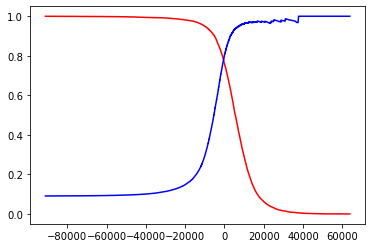

In [294]:
plt.plot(threshold, recall[:-1],'r')
plt.plot(threshold,precision[:-1],'b')

array([0.09095943, 0.09094418, 0.0909457 , ..., 1.        , 1.        ,
       1.        ])

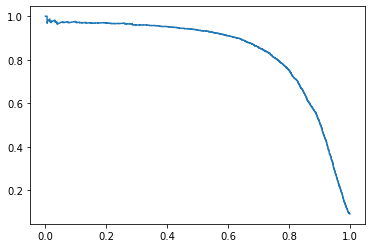

In [248]:
plt.plot(recall, precision)
precision

In [252]:
from sklearn.metrics import roc_curve
import numpy as np
threshold_90 = threshold[np.argmax(precision >= 0.90)]

y_pred_90 = (y_scores >= threshold_90)

recall_score(y_train_5, y_pred_90)

0.6294041689725143

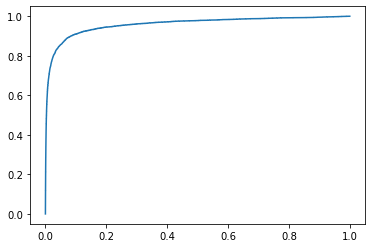

In [300]:
from sklearn.linear_model import SGDClassifier

fpr, tpr, threshold = roc_curve(y_train_5, y_scores)
plt.plot(fpr,tpr)

In [254]:
from sklearn.ensemble import RandomForestClassifier

rdforest = RandomForestClassifier()

rdforest.fit(X_train, y_train_5)

RandomForestClassifier()

In [275]:
y_probas_forst = cross_val_predict(rdforest,X_train, y_train_5, cv = 3, method = 'predict_proba')

In [301]:
from sklearn.metrics import precision_recall_curve
y_scores_forest = y_probas_forst[:,1]
fpr_f, tpr_f, threshold_f = roc_curve(y_train_5, y_scores_forest)

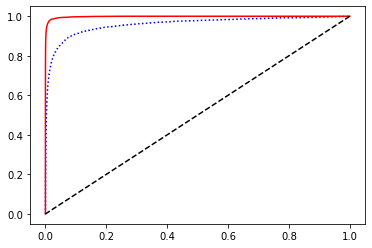

In [346]:
plt.plot(fpr,tpr, 'b:')
plt.plot(fpr_f, tpr_f, color = 'r', label = 'SGD')
plt.plot([1,0],[1,0],'k--', label = "random")


In [348]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores_forest)

0.9984074437890377

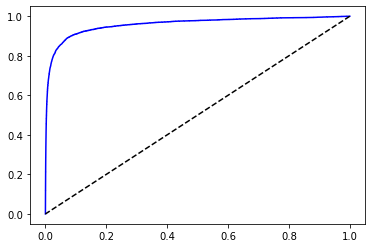

In [284]:
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [290]:
from sklearn.metrics import roc_auc_score

y_pred_90 = (y_scores >= threshold_90)

roc_auc_score(y_train_5, y_scores)


0.9589703559022139

In [288]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

SVC()

In [356]:
sgd.fit(X_train, y_train)

SGDClassifier(random_state=44)

In [358]:
sgd.decision_function([some_digit])

array([[-13681.24920981, -28389.42999311,  -9577.30296028,
          1976.11619205, -35783.52617472,   2419.27374993,
        -23922.00957152, -13108.23496675, -10340.0266054 ,
        -13631.60886894]])

In [377]:
from sklearn.model_selection import cross_val_score

y_train_pred = cross_val_predict(sgd, X_train, y_train,cv = 3)

In [370]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [413]:
conf_matrix = confusion_matrix(y_train, y_train_pred)

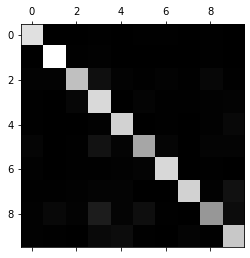

In [414]:
plt.matshow(conf_matrix, cmap = plt.cm.gray)

In [444]:
sum_rows = conf_matrix.sum(axis = 0, keepdims = True)

In [449]:
norm_conf_matrix = conf_matrix / sum_rows

print(conf_matrix)
print(norm_conf_matrix)

[[5738    0   22   31   12   32   36    2   39   11]
 [   3 6532   51   52   15   24   12   11   28   14]
 [  80   82 4900  396   88   46   86   50  195   35]
 [  45   19  162 5549   23  126   30   28   68   81]
 [  39   24   16   60 5361   23   30    9   54  226]
 [ 128   24   41  464  118 4257  136   13  124  116]
 [  63   15   49   44   62  116 5519    1   38   11]
 [  39   29   69  110  125   15    4 5367   56  451]
 [  74  220  102  730  113  366   40   17 3872  317]
 [  54   27   19  235  309   33    0  117   35 5120]]
[[9.16174357e-01 0.00000000e+00 4.05081937e-03 4.04119411e-03
  1.92740122e-03 6.35172688e-03 6.10894281e-03 3.56188780e-04
  8.64936793e-03 1.72359762e-03]
 [4.79003672e-04 9.36890419e-01 9.39053581e-03 6.77877721e-03
  2.40925153e-03 4.76379516e-03 2.03631427e-03 1.95903829e-03
  6.20980262e-03 2.19366970e-03]
 [1.27734313e-02 1.17613310e-02 9.02227951e-01 5.16229957e-02
  1.41342756e-02 9.13060738e-03 1.45935856e-02 8.90471950e-03
  4.32468397e-02 5.48417424e-03

In [450]:
sum_rows

array([[6263, 6972, 5431, 7671, 6226, 5038, 5893, 5615, 4509, 6382]])

In [451]:
np.fill_diagonal(norm_conf_matrix, 0)

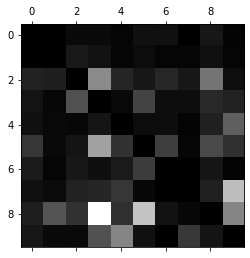

In [452]:
plt.matshow(norm_conf_matrix, cmap = plt.cm.gray)

In [455]:
a = 3 
b =8

X_aa = X_train[(y_train == a)&(y_train_pred == a)]
X_ab = X_train[(y_train == a)&(y_train_pred == b)]
X_ba = X_train[(y_train == b)&(y_train_pred == a)]
X_bb = X_train[(y_train == b)&(y_train_pred == b)]

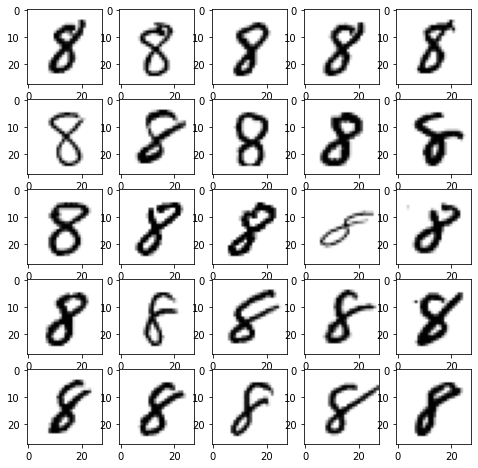

In [492]:
plt.figure(figsize= (8,8))

for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_bb[i].reshape(28,28), cmap ='binary')

In [556]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train>= 7)
y_train_odd = (y_train %2 == 1)
y_multilable = np.c_[y_train_large, y_train_odd]



In [557]:
noise = np.random.randint(0,100, (len(X_train),784))

X_train_mod = X_train + noise

noise = np.random.randint(0,100, (len(X_test),784))

X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

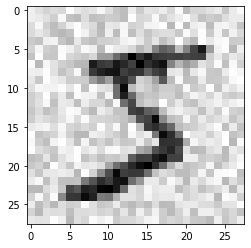

In [558]:
plt.imshow(X_train_mod[0].reshape(28,28), cmap = 'binary')

In [559]:
X_train_mod.shape

(60000, 784)

In [560]:
X_train.shape

(60000, 784)

In [561]:
knn.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

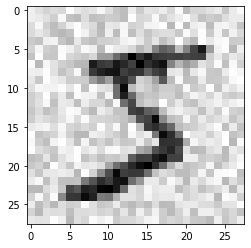

In [562]:
plt.imshow(X_train_mod[0].reshape(28,28), cmap = 'binary')

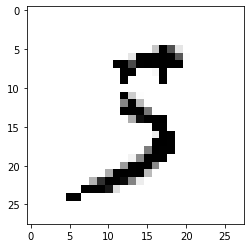

In [567]:
plt.imshow(knn.predict([X_train_mod[0]]).reshape(28,28), 'binary')

In [553]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])